Imports


In [119]:
import matplotlib.pyplot as plt
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
# ML
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score , recall_score
from sklearn.metrics import classification_report

Loading data


In [120]:
# Load the MNIST dataset
# data already comes splitted into training and testing
# x is the input and y is the classification
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data from 0 - 255 to 0 - 1
x_train = x_train / 255.0
x_test = x_test / 255.0

Creating model


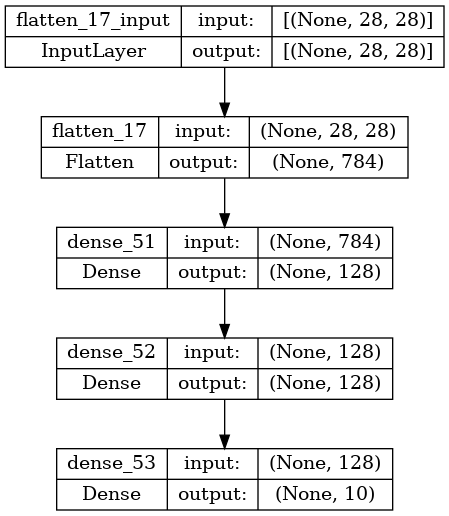

In [121]:

model = keras.Sequential([
    # Flattens the input (creates a flat layer)
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

tf.keras.utils.plot_model(model, 'default.png', show_shapes=True)

Training the model

In [122]:
# We compile the model using
# The stochastic gradient descent optimization algorithm Adam
# Sparse categorical crossentropy as our loss function

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model in 10 epochs and separating 20% for validation
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)
model.save('default.model')

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2518 - accuracy: 0.9255 - val_loss: 0.1501 - val_accuracy: 0.9540
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1066 - accuracy: 0.9674 - val_loss: 0.0993 - val_accuracy: 0.9705
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0741 - accuracy: 0.9770 - val_loss: 0.0963 - val_accuracy: 0.9724
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0556 - accuracy: 0.9823 - val_loss: 0.0867 - val_accuracy: 0.9736
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0429 - accuracy: 0.9860 - val_loss: 0.0852 - val_accuracy: 0.9770
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0343 - accuracy: 0.9894 - val_loss: 0.0890 - val_accuracy: 0.9772
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0300 - accuracy: 0.9901 - val_loss: 0.1063 - val_accuracy:

INFO:tensorflow:Assets written to: default.model/assets


INFO:tensorflow:Assets written to: default.model/assets


Evaluate model

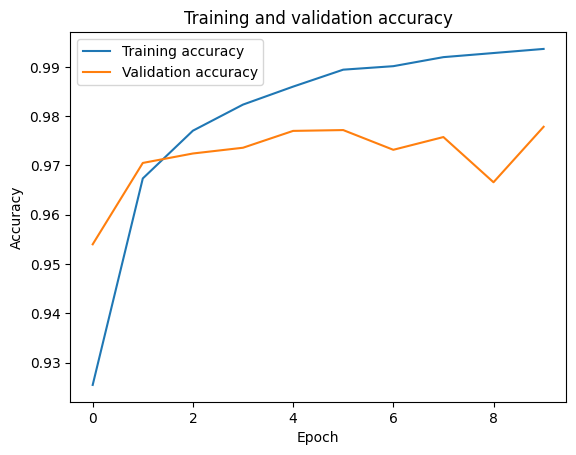

In [123]:
# Plot the accuracy during training
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [126]:
# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute precision and recall for each class
print(classification_report(y_test, y_pred_classes,digits=4))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0     0.9848    0.9929    0.9888       980
           1     0.9912    0.9912    0.9912      1135
           2     0.9864    0.9826    0.9845      1032
           3     0.9819    0.9683    0.9751      1010
           4     0.9805    0.9745    0.9775       982
           5     0.9709    0.9709    0.9709       892
           6     0.9842    0.9739    0.9790       958
           7     0.9765    0.9698    0.9732      1028
           8     0.9653    0.9702    0.9677       974
           9     0.9556    0.9822    0.9687      1009

    accuracy                         0.9779     10000
   macro avg     0.9777    0.9776    0.9777     10000
weighted avg     0.9780    0.9779    0.9779     10000



Changing activation function

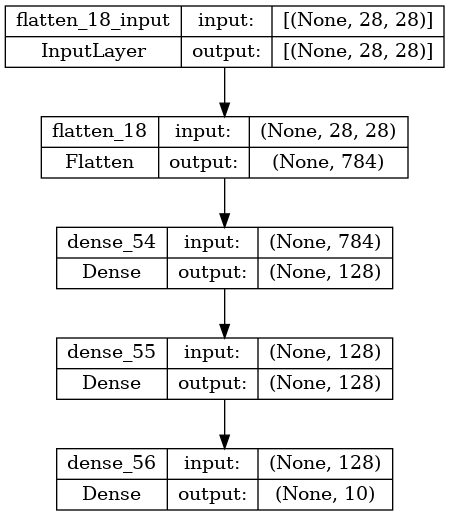

In [127]:
model = keras.Sequential([
    # Flattens the input (creates a flat layer)
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(num_classes, activation='softmax')
])

tf.keras.utils.plot_model(model, 'sigmoid.png', show_shapes=True)

In [130]:

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model in 10 epochs and separating 20% for validation
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)
model.save('sigmoid.model')

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0817 - accuracy: 0.9755 - val_loss: 0.1100 - val_accuracy: 0.9671
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0632 - accuracy: 0.9809 - val_loss: 0.0943 - val_accuracy: 0.9722
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0516 - accuracy: 0.9845 - val_loss: 0.0947 - val_accuracy: 0.9718
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0401 - accuracy: 0.9878 - val_loss: 0.1013 - val_accuracy: 0.9717
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0330 - accuracy: 0.9902 - val_loss: 0.0978 - val_accuracy: 0.9716
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0259 - accuracy: 0.9926 - val_loss: 0.0942 - val_accuracy: 0.9722
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0208 - accuracy: 0.9941 - val_loss: 0.0898 - val_accuracy:

INFO:tensorflow:Assets written to: sigmoid.model/assets


INFO:tensorflow:Assets written to: sigmoid.model/assets


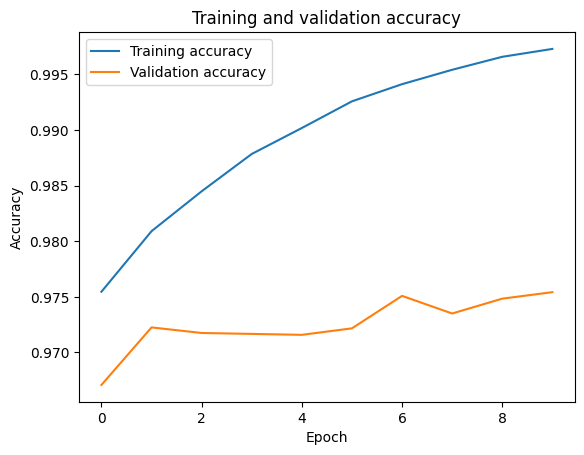

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0     0.9778    0.9888    0.9833       980
           1     0.9921    0.9903    0.9912      1135
           2     0.9730    0.9787    0.9758      1032
           3     0.9773    0.9792    0.9782      1010
           4     0.9764    0.9705    0.9734       982
           5     0.9733    0.9798    0.9765       892
           6     0.9791    0.9791    0.9791       958
           7     0.9851    0.9640    0.9744      1028
           8     0.9771    0.9651    0.9711       974
           9     0.9639    0.9802    0.9720      1009

    accuracy                         0.9777     10000
   macro avg     0.9775    0.9776    0.9775     10000
weighted avg     0.9777    0.9777    0.9777     10000



In [131]:
# Plot the accuracy during training
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute precision and recall for each class
print(classification_report(y_test, y_pred_classes,digits=4))


Decreasing neuron count

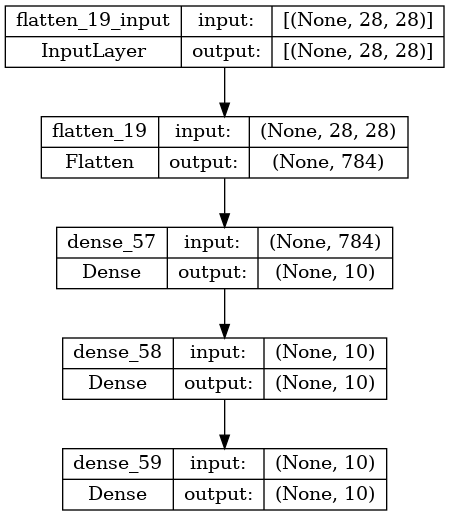

In [132]:
model = keras.Sequential([
    # Flattens the input (creates a flat layer)
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

tf.keras.utils.plot_model(model, 'neuron.png', show_shapes=True)

In [134]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model in 10 epochs and separating 20% for validation
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)
model.save('sigmoid.model')

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6492 - accuracy: 0.8053 - val_loss: 0.3414 - val_accuracy: 0.9008
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3371 - accuracy: 0.9022 - val_loss: 0.3037 - val_accuracy: 0.9118
Epoch 3/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3004 - accuracy: 0.9119 - val_loss: 0.2925 - val_accuracy: 0.9162
Epoch 4/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2794 - accuracy: 0.9182 - val_loss: 0.2672 - val_accuracy: 0.9221
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2651 - accuracy: 0.9225 - val_loss: 0.2587 - val_accuracy: 0.9249
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2555 - accuracy: 0.9252 - val_loss: 0.2566 - val_accuracy: 0.9270
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2476 - accuracy: 0.9272 - val_loss: 0.2510 - val_accuracy:

INFO:tensorflow:Assets written to: sigmoid.model/assets


INFO:tensorflow:Assets written to: sigmoid.model/assets


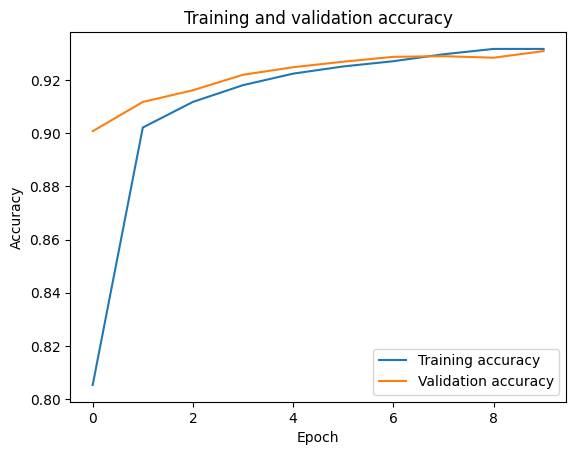

313/313 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0     0.9638    0.9510    0.9574       980
           1     0.9779    0.9736    0.9757      1135
           2     0.9490    0.9012    0.9245      1032
           3     0.8518    0.9277    0.8882      1010
           4     0.9119    0.9491    0.9301       982
           5     0.9123    0.8744    0.8930       892
           6     0.9360    0.9457    0.9408       958
           7     0.9301    0.9319    0.9310      1028
           8     0.8946    0.9148    0.9046       974
           9     0.9359    0.8831    0.9087      1009

    accuracy                         0.9262     10000
   macro avg     0.9263    0.9252    0.9254     10000
weighted avg     0.9272    0.9262    0.9263     10000



In [135]:
# Plot the accuracy during training
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute precision and recall for each class
print(classification_report(y_test, y_pred_classes,digits=4))


Changing optimizer

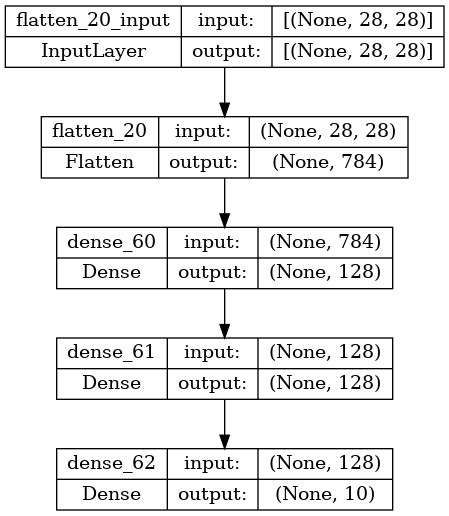

In [136]:
model = keras.Sequential([
    # Flattens the input (creates a flat layer)
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

tf.keras.utils.plot_model(model, 'sgd.png', show_shapes=True)

In [137]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model in 10 epochs and separating 20% for validation
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)
model.save('sgd.model')

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2513 - accuracy: 0.9261 - val_loss: 0.1361 - val_accuracy: 0.9588
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1033 - accuracy: 0.9688 - val_loss: 0.1003 - val_accuracy: 0.9703
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0699 - accuracy: 0.9781 - val_loss: 0.0984 - val_accuracy: 0.9706
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0551 - accuracy: 0.9826 - val_loss: 0.0915 - val_accuracy: 0.9732
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0396 - accuracy: 0.9872 - val_loss: 0.1046 - val_accuracy: 0.9703
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0333 - accuracy: 0.9892 - val_loss: 0.1117 - val_accuracy: 0.9709
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0275 - accuracy: 0.9908 - val_loss: 0.1043 - val_accuracy:

INFO:tensorflow:Assets written to: sgd.model/assets


INFO:tensorflow:Assets written to: sgd.model/assets


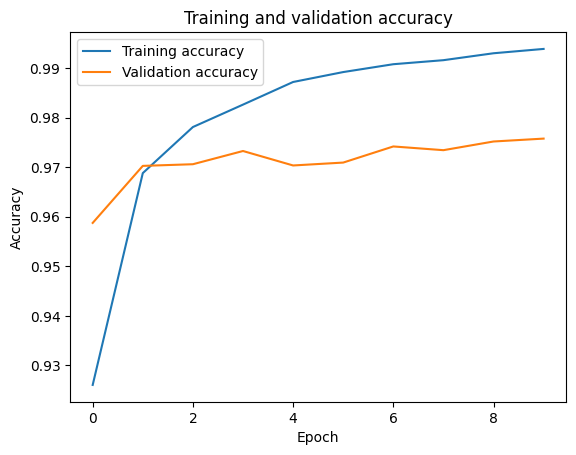

313/313 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0     0.9847    0.9827    0.9837       980
           1     0.9859    0.9885    0.9872      1135
           2     0.9760    0.9845    0.9802      1032
           3     0.9725    0.9792    0.9758      1010
           4     0.9897    0.9766    0.9831       982
           5     0.9840    0.9675    0.9757       892
           6     0.9743    0.9875    0.9808       958
           7     0.9813    0.9689    0.9750      1028
           8     0.9761    0.9630    0.9695       974
           9     0.9593    0.9822    0.9706      1009

    accuracy                         0.9783     10000
   macro avg     0.9784    0.9781    0.9782     10000
weighted avg     0.9784    0.9783    0.9783     10000



In [138]:
# Plot the accuracy during training
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute precision and recall for each class
print(classification_report(y_test, y_pred_classes,digits=4))
